TITRE : Visualisation / Nettoyage /Analyse d'un Dataset de plus de 8K Films Netflix (source : Kaggle)

Objet : Dans ce projet personnel de visualisation je fais l'analyse d'un dataset de plus de 8K films enfin d'approfondir mes connaissances sur la visualisatin python , le nettoyage  et de pouvoir apprendre à mieux utiliser .

Auteur : Jean-Claude BELINGA mail: jeanclaudebelingaemama@gmail.com

Date : 03/09/2025 

Contenu à structurer :
## Plan des 7 analyses
1.  Distribution Films vs Séries
2.  Top Pays Producteurs  
3.  Évolution Temporelle du Catalogue
4.  Univers des Genres
5.  Caractéristiques des Durées
6.  Classifications d'Âge
7.  Décalage Sortie/Ajout Netflix

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as mp 
import matplotlib.pyplot as plt 

pd.set_option("display.max_rows",40)
pd.set_option("display.width",100)
pd.set_option("display.float_format","{:.2f}".format)

In [ ]:
data_Netflix=pd.read_csv("Data_Set/netflix_titles.csv")

print(data_Netflix.head(10))
print(data_Netflix.shape)
print(data_Netflix.columns)
print(data_Netflix.info)


  show_id     type                             title                       director  \
0      s1    Movie              Dick Johnson Is Dead                Kirsten Johnson   
1      s2  TV Show                     Blood & Water                            NaN   
2      s3  TV Show                         Ganglands                Julien Leclercq   
3      s4  TV Show             Jailbirds New Orleans                            NaN   
4      s5  TV Show                      Kota Factory                            NaN   
5      s6  TV Show                     Midnight Mass                  Mike Flanagan   
6      s7    Movie  My Little Pony: A New Generation  Robert Cullen, José Luis Ucha   
7      s8    Movie                           Sankofa                   Haile Gerima   
8      s9  TV Show     The Great British Baking Show                Andy Devonshire   
9     s10    Movie                      The Starling                 Theodore Melfi   

                                          

In [ ]:
print(data_Netflix.isnull().sum)

print(data_Netflix.duplicated().sum)



<bound method DataFrame.sum of       show_id   type  title  director   cast  country  date_added  release_year  rating  duration  \
0       False  False  False     False   True    False       False         False   False     False   
1       False  False  False      True  False    False       False         False   False     False   
2       False  False  False     False  False     True       False         False   False     False   
3       False  False  False      True   True     True       False         False   False     False   
4       False  False  False      True  False    False       False         False   False     False   
...       ...    ...    ...       ...    ...      ...         ...           ...     ...       ...   
8802    False  False  False     False  False    False       False         False   False     False   
8803    False  False  False      True   True     True       False         False   False     False   
8804    False  False  False     False  False    False       

In [60]:

print(data_Netflix.dropna().sum)
print(data_Netflix.dropna(how='all').sum)

list_colonnes=data_Netflix.columns.to_list()
print(list_colonnes)
data_Netflix_clean=data_Netflix.dropna()

<bound method DataFrame.sum of      show_id     type                          title             director  \
7         s8    Movie                        Sankofa         Haile Gerima   
8         s9  TV Show  The Great British Baking Show      Andy Devonshire   
9        s10    Movie                   The Starling       Theodore Melfi   
12       s13    Movie                   Je Suis Karl  Christian Schwochow   
24       s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
8801   s8802    Movie                        Zinzana      Majid Al Ansari   
8802   s8803    Movie                         Zodiac        David Fincher   
8804   s8805    Movie                     Zombieland      Ruben Fleischer   
8805   s8806    Movie                           Zoom         Peter Hewitt   
8806   s8807    Movie                         Zubaan          Mozez Singh   

                                            

Netflix priorise t'il des films au series ? 
quelle est la répartition des films vs series ?

## qu'est ce qui est plus regardé films vs series ?

In [ ]:
i = (data_Netflix['type'] == 'Movie').sum()
j = (data_Netflix['type'] == 'TV Show').sum()

print("Le nombre de films est : {i} et le nombre de séries est : {j}")

percentage_film = (i*100)/5332
percentage_serie=(j*100)/5332

print("le pourcentage de films est :{} et le pourcentage de series est :{}".format(percentage_film,percentage_serie))

films={}
series={}

films = {

    "nbre_films" : i ,
    "pourcentage_films":percentage_film,
}

series ={
    "nbre_series":j,
    "pourcentage_series":percentage_serie
}

print(films)
print(series)

Le nombre de films est : {i} et le nombre de séries est : {j}
le pourcentage de films est :97.2430607651913 et le pourcentage de series est :2.7569392348087023
{'nbre_films': np.int64(5185), 'pourcentage_films': np.float64(97.2430607651913)}
{'nbre_series': np.int64(147), 'pourcentage_series': np.float64(2.7569392348087023)}


In [45]:
data_Netflix.shape

(5332, 12)

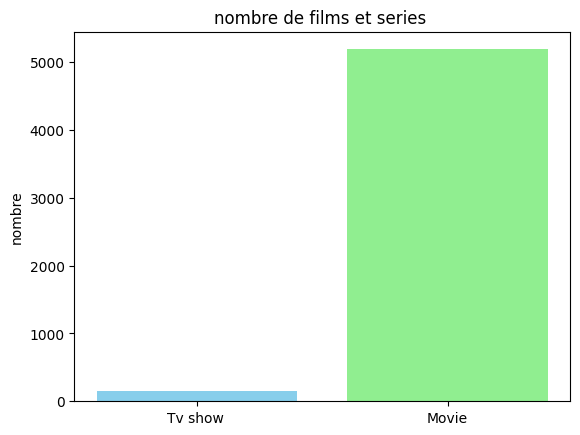

In [57]:
import matplotlib.pyplot as plt 

labels= ['Tv show ', 'Movie']

value = [j,i]

plt.bar (labels ,value ,color =['skyblue','lightgreen'])

plt.title("nombre de films et series ")

plt.ylabel("nombre")

plt.show()




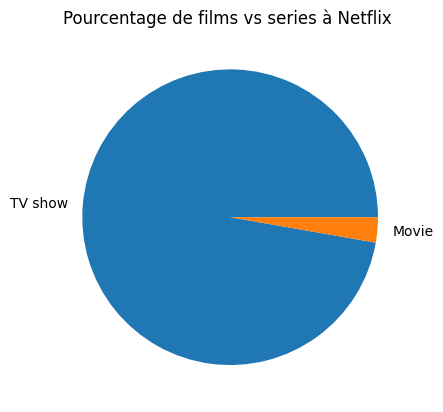

In [59]:
import matplotlib.pyplot as plt

labels =['TV show','Movie']

value = [ percentage_film,percentage_serie]

plt.pie(value,labels=labels )

plt.title ('Pourcentage de films vs series à Netflix ')

plt.show()

Après nos 02 représentations graphiques nous constatons que Netflix produit plus de films que de series mais quand est il de la repartition géographique de cette production 


##  Etude de la repartition geographique des productions Netflix 

In [68]:
for index, row in data_Netflix.iterrows():
    if pd.notna(row['country']):          
        countries = [c.strip() for c in row['country'].split(",")]  # enlever les espaces
        print(countries.count('Ghana'))
        print(countries)


1
['United States', 'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia']
0
['United Kingdom']
0
['United States']
0
['Germany', 'Czech Republic']
0
['India']
0
['United States']
0
['United States']
0
['United States', 'India', 'France']
0
['China', 'Canada', 'United States']
0
['United States']
0
['United States']
0
['United States']
0
['United States']
0
['South Africa', 'United States', 'Japan']
0
['United States']
0
['Japan']
0
['Japan']
0
['Japan']
0
['Japan']
0
['Japan']
0
['Japan']
0
['Japan']
0
['Japan']
0
['Japan']
0
['Japan']
0
['Japan']
0
['Japan']
0
['Nigeria']
0
['United States']
0
['Nigeria']
0
['Spain', 'United States']
0
['United Kingdom', 'United States']
0
['United States']
0
['India']
0
['United States']
0
['India']
0
['United Kingdom', 'Australia', 'France']
0
['India']
0
['India']
0
['United Kingdom', 'Australia', 'France', 'United States']
0
['India']
0
['United States', 'Canada']
0
['Germany', 'United States']
0
['United States']
0
['South Africa', 'U

In [77]:
all_countries = all_countries.explode()
all_countries = all_countries.str.strip()

print(all_countries)

7        United States
7                Ghana
7         Burkina Faso
7       United Kingdom
7              Germany
             ...      
8801            Jordan
8802     United States
8804     United States
8805     United States
8806             India
Name: country, Length: 6882, dtype: object


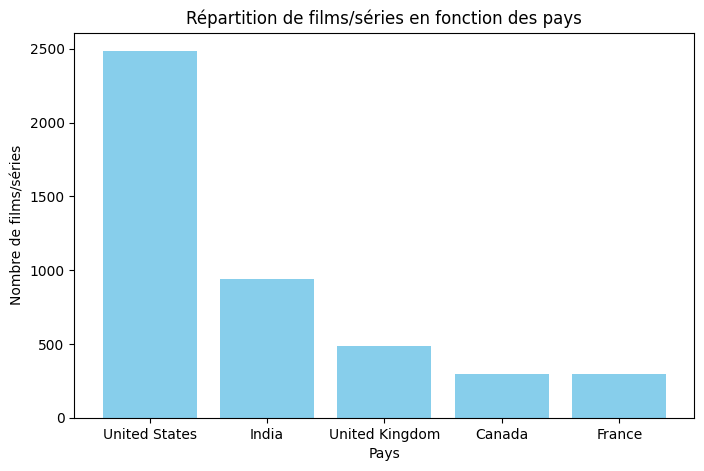

In [82]:
import matplotlib.pyplot as plt

# Meilleurs 5 pays
meilleur = counts.head(5)

# Labels = noms des pays
labels = meilleur.index

# Valeurs = nombre de films/séries
values = meilleur.values

# Création du graphique
plt.figure(figsize=(8,5))
plt.bar(labels, values, color='skyblue')
plt.title("Répartition de films/séries en fonction des pays")
plt.ylabel("Nombre de films/séries")
plt.xlabel("Pays")
plt.show()


In [93]:
data_country = data_Netflix['country'].dropna().str.strip(',')

data_country = data_country.explode()

data_country = data_country.str.strip()

data_counts = data_country.value_counts()

print(data_counts.head(5))



country
United States     1846
India              875
United Kingdom     184
Canada             107
Spain               91
Name: count, dtype: int64


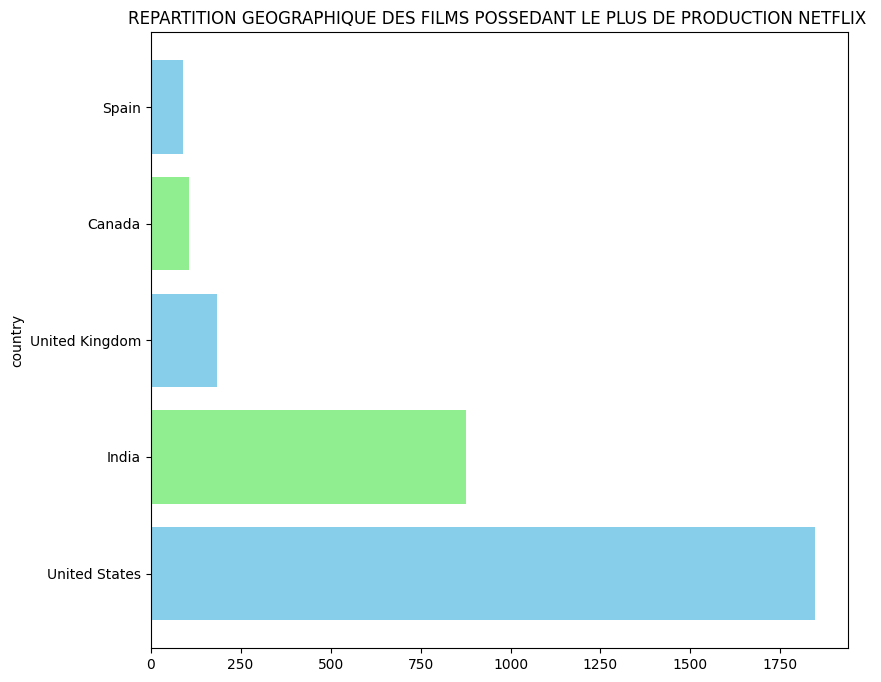

In [128]:
import matplotlib.pyplot as plt

meilleur = data_counts.head(5)

labels = meilleur.index 

values = meilleur.values

plt.figure(figsize=(9,8))

plt.title("REPARTITION GEOGRAPHIQUE DES FILMS POSSEDANT LE PLUS DE PRODUCTION NETFLIX ")

plt.ylabel("country")

plt.barh(labels , values,color =['skyblue','lightgreen'])

plt.grid(False)

plt.show()




Après analyse nous pouvons interpréter que d'après notre analyse les USA et l'inde ont plus de production Netflix comparé aux autres pays du monde

on peut en tirer que Netflix maintient une diversité géographique pour toucher certains abonnés et se focalise sur les marchés à forte audience et rentables .

## Comment le nombre total de contenus (films et séries) a-t-il évolué au fil des années ?

In [109]:
data_Netflix["annéé_ajout"]=None

newlist_columns=data_Netflix.columns.to_list()

print(newlist_columns)


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'annéé_ajout']


In [132]:
data_years = data_Netflix["date_added"].dropna().astype(str).str.strip()

print(data_years)

data_Netflix.groupby(["date_added","type"]).size().unstack()


7       2021-09-24
8       2021-09-24
9       2021-09-24
12      2021-09-23
24      2021-09-21
           ...    
8801    2016-03-09
8802    2019-11-20
8804    2019-11-01
8805    2020-01-11
8806    2019-03-02
Name: date_added, Length: 5332, dtype: object


type,Movie,TV Show
date_added,,
2008-01-01,1.00,NaN
2009-05-05,1.00,NaN
2009-11-18,1.00,NaN
2010-11-01,1.00,NaN
2011-05-17,1.00,NaN
...,...,...
2021-09-19,2.00,NaN
2021-09-20,1.00,NaN
2021-09-21,1.00,NaN


In [120]:
data_years=data_years.sort_index

In [133]:
data_Netflix_clean.groupby(["release_year","type"]).size().unstack()


type,Movie,TV Show
release_year,,
1942,1.00,NaN
1944,1.00,NaN
1945,1.00,NaN
1946,1.00,NaN
1947,1.00,NaN
...,...,...
2017,640.00,17.00
2018,632.00,16.00
2019,495.00,24.00


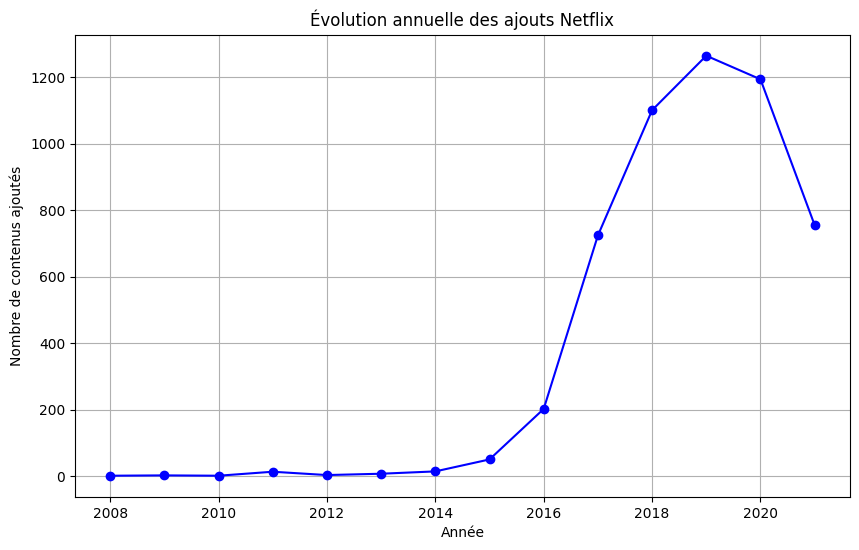

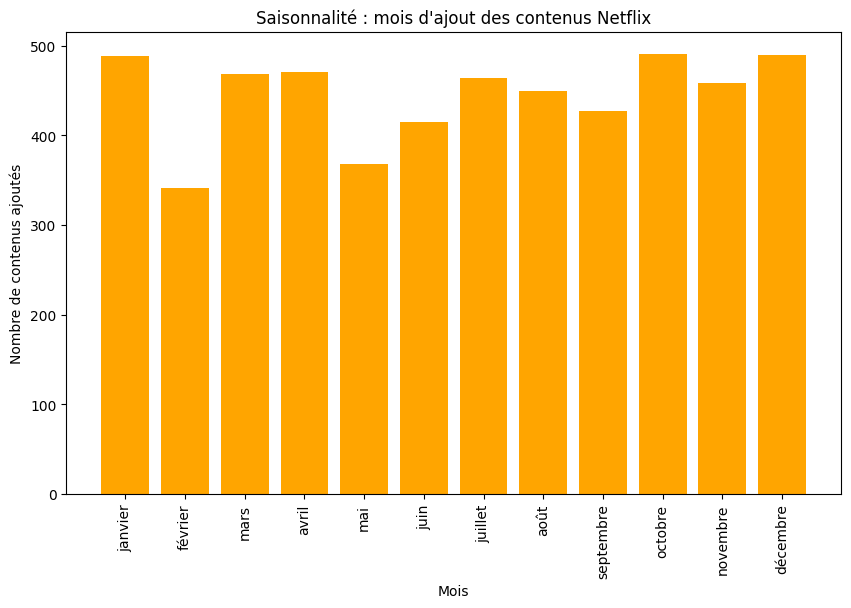

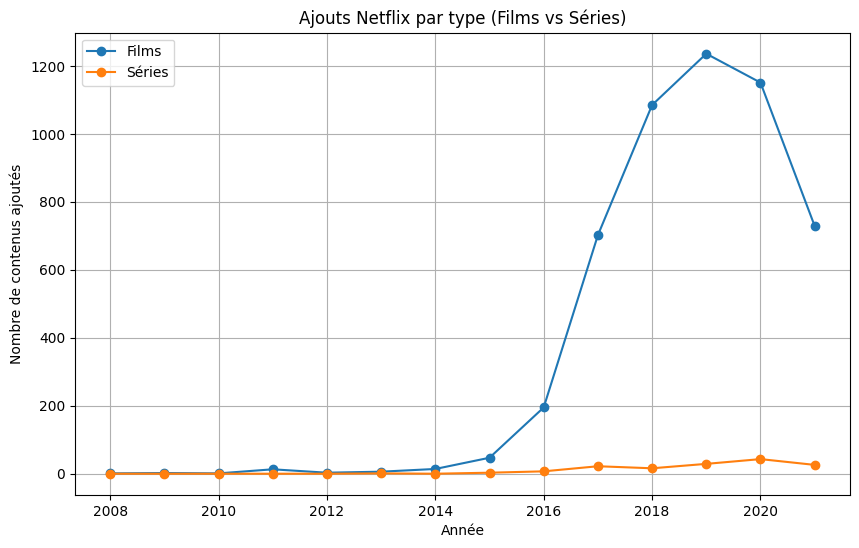

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar



data_Netflix['date_added'] = pd.to_datetime(data_Netflix['date_added'], errors='coerce')  
data_Netflix['year_added'] = data_Netflix['date_added'].dt.year     
data_Netflix['month_added'] = data_Netflix['date_added'].dt.month   


year_counts = data_Netflix['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(year_counts.index, year_counts.values, marker='o', color='blue')
plt.title("Évolution annuelle des ajouts Netflix")
plt.xlabel("Année")
plt.ylabel("Nombre de contenus ajoutés")
plt.grid(True)
plt.show()


month_counts = data_Netflix['month_added'].value_counts().sort_index()
months = [calendar.month_name[i] for i in month_counts.index] 

plt.figure(figsize=(10,6))
plt.bar(months, month_counts.values, color='orange')
plt.title("Saisonnalité : mois d'ajout des contenus Netflix")
plt.xlabel("Mois")
plt.ylabel("Nombre de contenus ajoutés")
plt.xticks(rotation=90)
plt.show()


type_year_counts = data_Netflix.groupby(['year_added', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
plt.plot(type_year_counts.index, type_year_counts['Movie'], marker='o', label='Films')
plt.plot(type_year_counts.index, type_year_counts['TV Show'], marker='o', label='Séries')
plt.title("Ajouts Netflix par type (Films vs Séries)")
plt.xlabel("Année")
plt.ylabel("Nombre de contenus ajoutés")
plt.legend()
plt.grid(True)
plt.show()



Nous remarquons , que Netflix fait plus d'ajouts de films que de series, et enregistre moins de productions entre février et mai et a connu un pic de 2018 à 2020 du au COVID 19